In [1]:
import pandas as pd
import numpy as np

## Preprocessing

In [2]:
data = pd.read_csv('src/netflix_titles.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [3]:
missing_val = data.isna().sum()
missing_val

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [4]:
fill_missing_val = ['director', 'cast', 'country', 'duration']
for col in fill_missing_val:
    data[col] = data[col].fillna('Unknown')
data = data.dropna(subset=['date_added'])
data['rating'] = data['rating'].fillna(data['rating'].mode()[0])
print(data.isna().sum())

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


In [5]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## First graph

In [6]:
import plotly.graph_objects as go

type_counts = data['type'].value_counts()

fig = go.Figure()
fig.add_trace(go.Bar(
    x=type_counts.index, 
    y=type_counts.values,
    width=[0.3, 0.3] 
    ))
fig.update_layout(
    title = "Distribution of Type (Movie vs TV Show)",
    xaxis_title="Type",
    yaxis_title="Count",
)
fig.show()


## Second graph

In [7]:
movies = data[data['type'] == 'Movie']
tv_shows = data[data['type'] == 'TV Show']

In [8]:
# count country (get 10 values)
movies_country_counts = movies['country'].value_counts().head(10).drop('Unknown', errors='ignore')
tv_shows_country_counts = tv_shows['country'].value_counts().head(10).drop('Unknown', errors='ignore')
all_country_counts = data['country'].value_counts().head(10).drop('Unknown', errors='ignore')

In [9]:
tv_shows_country_counts

country
United States     754
United Kingdom    212
Japan             168
South Korea       158
India              79
Taiwan             68
Canada             59
France             49
Spain              48
Name: count, dtype: int64

In [11]:
fig2 = go.Figure()


# All
fig2.add_trace(go.Bar(
    x=all_country_counts.values,
    y=all_country_counts.index,
    orientation='h',
    name='All',
    visible=True
))

# Move
fig2.add_trace(go.Bar(
    x=movies_country_counts.values,
    y=movies_country_counts.index,
    orientation='h',
    name='Movies',
    visible=False
))

# tv shows
fig2.add_trace(go.Bar(
    x=tv_shows_country_counts.values,
    y=tv_shows_country_counts.index,
    orientation='h',
    name='TV Shows',
    visible=False
))

#Dropdown
fig2.update_layout(
    updatemenus=[
        # active = 0 -> default with the first option (All)
        dict(active=0,buttons=list([
        dict(label="All",method="update", args=[{"visible": [True, False, False]}, {"title": "Top 10 Countries - All Titles"}]),
        dict(label="Movies", method="update", args=[{"visible": [False, True, False]}, {"title": "Top 10 Countries - Movies Only"}]),
        dict(label="TV Shows", method="update", args=[{"visible": [False, False, True]}, {"title": "Top 10 Countries - TV Shows Only"}])
            ]),
        direction="down",
        showactive=True,
        )
    ],
    title="Top 10 Countries - All Titles",
    xaxis_title="Number of Titles",
    yaxis_title="Country",
    height=600
)

fig2.show()

From the bar chart, we observe that the United States leads in the production of Netflix content, followed by India and the United Kingdom. This indicates a strong dominance of English-speaking countries on the platform, with significant representation from India as well.

### Third visualizaiton

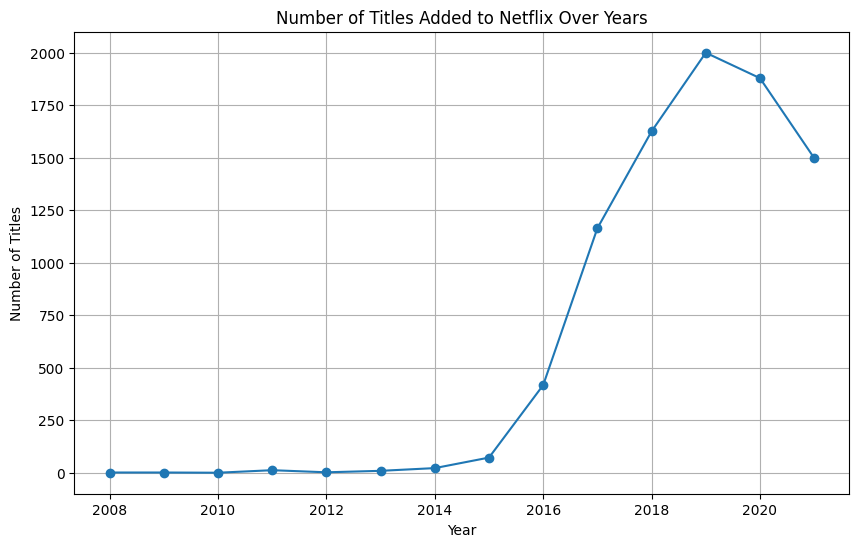

In [12]:
data['date_added'] = pd.to_datetime(data['date_added'], errors='coerce')

data['year_added'] = data['date_added'].dt.year
df_year = data.dropna(subset=['year_added'])
titles_per_year = df_year['year_added'].value_counts().sort_index()
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
titles_per_year.plot(kind='line', marker='o')
plt.title('Number of Titles Added to Netflix Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.grid()
plt.show()


The line chart shows that Netflix significantly expanded its content library after 2015, peaking around 2019-2020. This rapid growth reflects Netflix's aggressive global expansion and investment in original content.


From the analysis, it is evident that Netflix's content is predominantly produced by the United States, with India and the UK following closely. Furthermore, Netflix has seen a rapid increase in the number of shows and movies added each year, especially during 2018–2020. This reflects the platform's strategy of scaling globally and diversifying its library.
